In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress
from sklearn import linear_model

In [2]:
error = np.random.randn(10**4)
lng = 0.02+0.02*error
g = np.exp(lng)
rf = 1.0303

In [3]:
b0 = np.arange(0,10.1,0.1)

In [4]:
upper = 1.1
lower = 1.0
x0 = (upper + lower)/2
rfr = 1.0303

In [5]:
# Comparing gain vs loss, loss has 2x more sensitivity

def nu(x):
    nu_list = []
    for i in g:
        if x*i >= rfr:
            y = x*i - rfr
        else:
            y = 2 * (x*i - rfr)
        nu_list.append(y)
    return nu_list

In [6]:
def exfunc(x, b):
    output = 0.99*b*np.mean(nu(x))+0.99*x-1
    return output

In [7]:
x_list = []
for b in b0:
    upper = 1.1
    lower = 1.0
    output = exfunc((upper+lower)/2, b)
    while abs(output) > 1e-5:
        if output>0:
            upper=(lower+upper)/2
            output = exfunc((lower+upper)/2,b)
        else:
            lower=(lower+upper)/2
            output = exfunc((lower+upper)/2,b)
    x_list.append((upper+lower)/2)

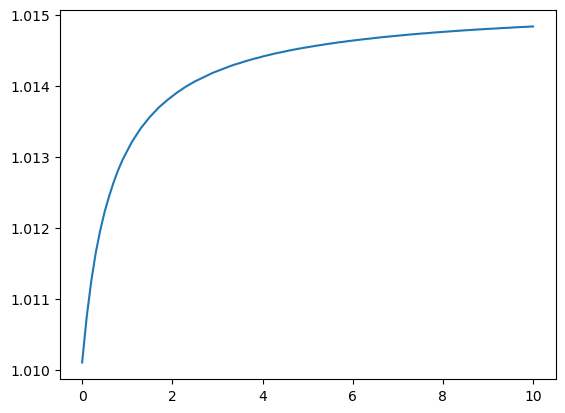

In [8]:
plt.plot(b0, x_list)

In [9]:
array_xlist = np.array(x_list)

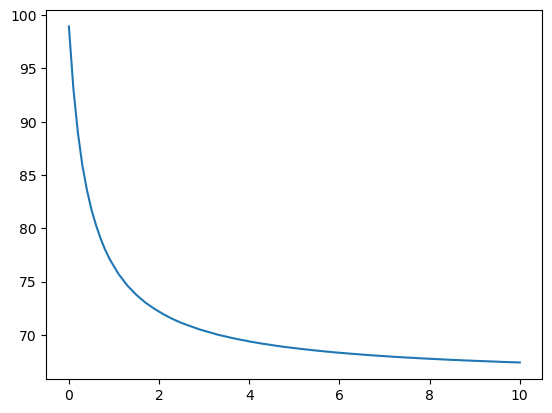

In [10]:
PD_ratio = 1/(array_xlist-1)
plt.plot(b0, PD_ratio)

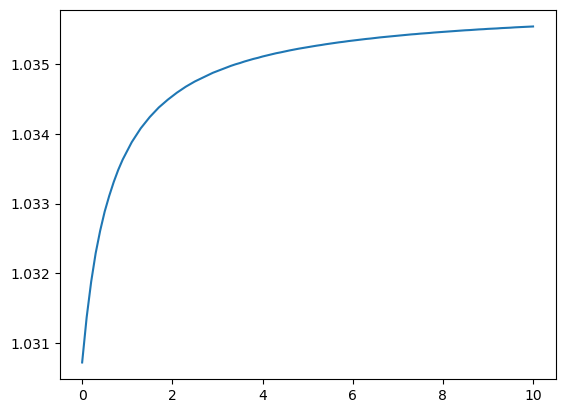

In [11]:
E_Rm = array_xlist * np.exp(0.0202)
plt.plot(b0, E_Rm)